In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

In [2]:
def LeastSquares(x_arr, y_arr): # returns [k, b, sigma_k, sigma b]
    v = x_arr
    u = y_arr

    N = len(v)

    mu = np.mean(u) # средее
    mv = np.mean(v)
    mv2 = np.mean([v_i**2 for v_i in v]) # средний квадрат
    mu2 = np.mean([u_i**2 for u_i in u])
    muv = np.mean ([u[i] * v[i] for i in range(len(u))]) # среднее от произведения
    k = (muv - mu * mv) / (mv2 - mv**2)
    b = mu - k * mv

    sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    sigma_b = sigma_k * np.sqrt(mv2)

    return (k, b, sigma_k, sigma_b)

In [3]:
brute_force_results = []
vectorized_results  = []

with open ('testresults/res1.csv', "r") as test_results_file:
    lines = test_results_file.readlines ()
    brute_force_results = lines[0].split(',')[1:]
    vectorized_results  = lines[1].split(',')[1:]

bf_i = brute_force_results.index(' \n')
brute_force_results = brute_force_results[:bf_i] + brute_force_results[bf_i+1:]
v_i = vectorized_results.index(' \n')
vectorized_results = vectorized_results[:v_i] + vectorized_results[v_i+1:]

print (brute_force_results)

brute_force_results = [int(res) for res in brute_force_results]
vectorized_results  = [int(res) for res in vectorized_results]

[' 14583741318', ' 14541658557', ' 15540929927', ' 14921384168', ' 14494876330', ' 14533025942', ' 14546566369', ' 14534818272', ' 14520482307', ' 14741082421', ' 14483198655', ' 14501121241', ' 14483813111', ' 14515194020', ' 14449977845', ' 14533928719', ' 14506396441', ' 14494690508', ' 14499572596', ' 14500041964', ' 14496424226', ' 14505135495', ' 14485902063', ' 14476704088', ' 14519611832', ' 14498745135', ' 14489936827', ' 14502458104', ' 14685043472', ' 14628798384', ' 14497742718', ' 14488821233', ' 14489138100', ' 14445162187', ' 14534712186', ' 14525361528', ' 14505159574', ' 14506448899', ' 14556815386', ' 14489741883', ' 14457150698', ' 14607555354', ' 14510785253', ' 14518507037', ' 14513527715', ' 14545674992', ' 14481954077', ' 14501131443', ' 14531363744', ' 14512334915', ' 14504466104', ' 14519910483', ' 14466998295', ' 14493544551', ' 14609647703', ' 14511241360', ' 14510474740', ' 14495625025', ' 14498820998', ' 14496019138', ' 14506798313', ' 14496668278', ' 14510

In [4]:
brute_mean = np.mean (brute_force_results)
brute_std  = np.std (brute_force_results)
brute_eps  = round (brute_std / brute_mean * 100, 2)

In [5]:
vec_mean = np.mean (vectorized_results)
vec_std  = np.std (vectorized_results)
vec_eps  = round (vec_std / vec_mean * 100, 2)

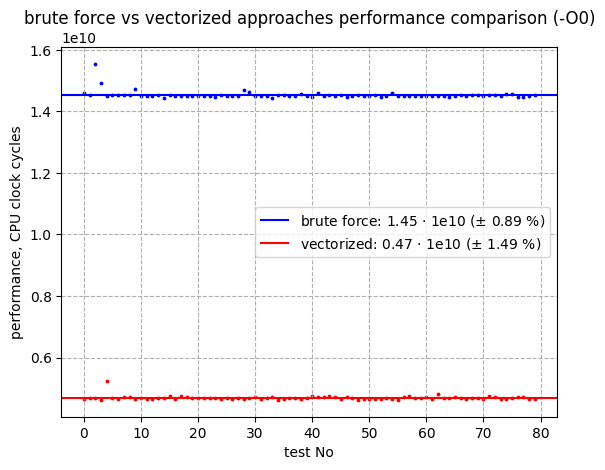

In [6]:
plt.figure()
plt.xlabel("test No")
plt.ylabel("performance, CPU clock cycles")
plt.title('brute force vs vectorized approaches performance comparison (-O0)')
plt.grid(True, linestyle = '--')
plt.scatter(range (0, len (brute_force_results)), brute_force_results, s=3, c = "blue")
plt.scatter(range (0, len (vectorized_results)), vectorized_results, s=3, c = "red")

plt.axhline (y=brute_mean, label = f"brute force: {round (brute_mean / 1e10, 2)} $\cdot$ 1e10 ($\pm$ {brute_eps} %)", color="blue")
plt.axhline (y=vec_mean, label = f"vectorized: {round (vec_mean / 1e10, 2)} $\cdot$ 1e10 ($\pm$ {vec_eps} %)", color = "red")
# k, b, kerr, berr = LeastSquares(range (0, len (brute_force_results)), brute_force_results)
# x = np.array([min(range (0, len (brute_force_results))), max(range (0, len (brute_force_results)))])
# plt.plot(x, k*x + b, "-", linewidth = 1)

# k, b, kerr, berr = LeastSquares(range (1, len (vectorized_results) + 1), vectorized_results)
# x = np.array([min(range (0, len (vectorized_results))), max(range (0, len (vectorized_results)))])
# plt.plot(x, k*x + b, "-", linewidth = 1)
plt.savefig ("testresults/graph/graph.png", bbox_extra_artists=(plt.legend(),), bbox_inches='tight')
plt.legend()

In [7]:
print (brute_mean / vec_mean)

3.0952785889421355
